Load packages

In [20]:
import pandas as pd
import sys
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN

Load training and test data

In [21]:
# INPUT NORMALIZED DATASET WITH ONLY 'ID' COLUMN and features COLUMN
#Load data from github
url1 = 'https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/train_data.txt'
train = pd.read_table(url1)

url2 = 'https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/test_data.txt'
test = pd.read_table(url2)


Print Train and test data

In [3]:
train

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,TCGA-DD-AACA,0.536360,0.0,0.640291,0.467640,0.000000,0.652035,0.328277,0.244427,0.880648,0.000000,0.000000,0.396641,0.439681,0.415694,0.356294,0.699024,0.325710,0.000000,0.702078,0.170954,0.157849,0.000000,0.000000,0.000000,0.000000,0.346621,0.571765,0.080447,0.120070,0.000000,0.000000,0.104264,0.0,0.257586,0.0,0.327132,0.000000,0.722097,0.106506,...,0.398417,1.000000,0.687390,0.652000,0.503982,0.196964,0.710872,0.777706,0.456485,0.777603,0.776327,0.659625,0.592138,0.787227,0.678766,0.955434,0.630447,0.755421,0.755421,0.658692,0.697720,0.000000,0.795788,0.795788,0.523559,0.631544,0.512036,0.786181,0.960621,0.889603,0.510361,0.904624,0.758988,0.456828,0.187634,0.623492,0.759754,0.000000,0.855066,0.457845
1,TCGA-ZS-A9CG,0.721645,0.0,0.914832,0.250453,0.000000,0.756713,0.593214,0.352604,0.751974,0.275440,0.000000,0.365227,0.432107,0.474366,0.697188,0.391892,0.224630,0.544166,0.253155,0.000000,0.000000,0.000000,0.379792,0.000000,0.000000,0.000000,0.444295,0.095989,0.174320,0.236391,0.000000,0.230081,0.0,0.120479,0.0,0.308239,0.000000,0.485696,0.218255,...,0.457078,0.721734,0.760365,0.627196,0.475247,0.289495,0.667570,0.694386,0.390702,0.736506,0.724666,0.585749,0.492529,0.797636,0.603029,0.948305,0.507633,0.507551,0.507551,0.503697,0.893449,0.000000,0.828712,0.828712,0.412575,0.462698,0.270532,0.649497,0.788613,0.765529,0.484238,0.661404,0.715211,0.405025,0.337437,0.399923,0.764550,0.000000,0.782095,0.313778
2,TCGA-ZS-A9CD,0.493477,0.0,0.721974,0.540088,0.148985,0.542105,0.627047,0.531698,0.713206,0.000000,0.094400,0.327706,0.609054,0.598778,0.507359,0.246830,0.164240,0.320349,0.318299,0.000000,0.000000,0.000000,0.434534,0.000000,0.143571,0.050827,0.449909,0.000000,0.313443,0.000000,0.114724,0.080842,0.0,0.355848,0.0,0.360867,0.000000,0.370815,0.044652,...,0.455217,0.197021,0.846728,0.691955,0.244728,0.276409,0.601888,0.400989,0.408032,0.765627,0.674600,0.490188,0.294519,0.779057,0.579488,0.956950,0.456951,0.321190,0.321190,0.468702,0.756942,0.000000,0.808425,0.808425,0.386483,0.680511,0.250712,0.522266,0.370563,0.811146,0.550733,0.695956,0.683392,0.211521,0.204840,0.654678,0.679134,0.675135,0.845510,0.409606
3,TCGA-ZP-A9D4,0.593125,0.0,0.807373,0.135391,0.000000,0.613164,0.024140,0.055172,0.803892,0.000000,0.000000,0.439985,0.216046,0.480845,0.415946,0.022546,0.040810,0.258379,0.220116,0.000000,0.000000,0.000000,0.001970,0.081077,0.000000,0.039684,0.137959,0.000000,0.114271,0.000000,0.000000,0.172107,0.0,0.060259,0.0,0.589314,0.000000,0.373978,0.066352,...,0.615724,0.333784,0.690582,0.723642,0.570280,0.302540,0.508588,0.861510,0.467603,0.682740,0.771822,0.665307,0.665010,0.795255,0.677320,0.960159,0.603653,0.783219,0.783219,0.674068,0.220734,0.954485,0.811598,0.811598,0.527439,0.795719,0.469337,0.709432,0.858508,0.849308,0.516074,0.710162,0.767924,0.433652,0.445360,0.331529,0.844824,0.772143,0.697840,0.512421
4,TCGA-ZP-A9D1,0.414785,0.0,0.597059,0.431546,0.038638,0.619589,0.417661,0.561736,0.691439,0.000000,0.000000,0.380385,0.644867,0.600597,0.649244,0.340362,0.078109,0.000000,0.101172,0.000000,0.127522,0.198914,0.383919,0.108197,0.000000,0.177517,0.292503,0.000000,0.235223,0.000000,0.000000,0.157918,0.0,0.080416,0.0,0.152892,0.000000,0.330951,0.046525,...,0.3

In [4]:
test

,id,hsa_mir_107,hsa_mir_1225,hsa_mir_125b.1,hsa_mir_1271,hsa_mir_137,hsa_mir_139,hsa_mir_149,hsa_mir_150,hsa_mir_152,hsa_mir_1914,hsa_mir_1915,hsa_mir_210,hsa_mir_212,hsa_mir_215,hsa_mir_22,hsa_mir_25,hsa_mir_3074,hsa_mir_3145,hsa_mir_3170,hsa_mir_3176,hsa_mir_320d.2,hsa_mir_320e,hsa_mir_339,hsa_mir_3620,hsa_mir_3622a,hsa_mir_3662,hsa_mir_3677,hsa_mir_3681,hsa_mir_376c,hsa_mir_3911,hsa_mir_3936,hsa_mir_3941,hsa_mir_3943,hsa_mir_4286,hsa_mir_4427,hsa_mir_4510,hsa_mir_4667,hsa_mir_4677,hsa_mir_4732,...,ZNF343,ZNF398,ZNF408,ZNF433,ZNF461,ZNF485,ZNF487,ZNF493,ZNF500,ZNF521,ZNF597,ZNF600,ZNF607,ZNF623,ZNF662,ZNF668,ZNF669,ZNF670,ZNF670.1,ZNF675,ZNF691,ZNF705A,ZNF709,ZNF709.1,ZNF736,ZNF746,ZNF764,ZNF765,ZNF775,ZNF777,ZNF785,ZNF788,ZNF8,ZNF836,ZNF84,ZNF853,ZNF891,ZP1,ZP3,ZSCAN9
0,TCGA-ZS-A9CF,0.534461,0.0,0.835300,0.505010,0.000000,0.534293,0.256742,0.423004,0.745062,0.000000,0.000000,0.461365,0.288726,0.651398,0.405351,0.404740,0.427230,0.000000,0.430077,0.000000,0.334629,0.196683,0.162872,0.106909,0.000000,0.000000,0.172435,0.342947,0.202058,0.000000,0.000000,0.221032,0.000000,0.000000,0.186445,0.270581,0.000000,0.500455,0.280237,...,0.648601,0.339739,0.092888,0.804074,0.611819,0.469216,0.447884,0.808616,0.787718,0.726781,0.886455,0.711483,0.702066,0.316689,0.627699,0.966677,0.851948,0.886775,0.886775,0.758871,0.799251,0.685284,0.947100,0.947100,0.688624,0.211421,0.693097,0.753576,-0.047407,0.744829,0.562566,0.903513,0.813149,0.348356,0.720709,0.501326,0.927659,0.827978,0.786933,0.792145
1,TCGA-ZS-A9CE,0.671573,0.0,0.770282,0.225123,0.000000,0.759449,0.471126,0.203685,0.674457,0.000000,0.130251,0.596748,0.162853,0.550628,0.490442,0.389503,0.177257,0.336293,0.228893,0.000000,0.168870,0.000000,0.364218,0.000000,0.000000,0.000000,0.363819,0.308074,0.232524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.747933,0.000000,0.354364,0.000000,...,0.416845,0.363675,0.670939,0.778893,0.478563,0.460107,0.776802,0.813541,0.497676,0.702069,0.756846,0.610062,0.706311,0.405470,0.597139,0.975772,0.713907,0.815899,0.815899,0.637456,0.796144,0.000000,0.781646,0.781646,0.558160,0.379755,0.366743,0.703712,0.720119,0.775083,0.517003,0.727918,0.776292,0.450356,0.240548,0.555972,0.788237,0.675910,0.870589,0.728732
2,TCGA-ZP-A9D2,0.489922,0.0,0.677347,0.394343,0.000000,0.532100,0.617602,0.470660,0.726709,0.110133,0.113194,0.493995,0.541345,0.271372,0.653821,0.366450,0.098439,0.164538,0.089703,0.000000,0.076391,0.000000,0.287246,0.124516,0.000000,0.236650,0.567740,0.000000,0.333229,0.262281,0.000000,0.096936,0.106484,0.092545,0.000000,0.527328,0.000000,0.601133,0.000000,...,0.740117,0.648184,0.858411,0.765370,0.887773,0.466498,0.752424,0.872149,0.738545,0.751606,1.146746,0.829409,0.430651,0.808747,0.559902,0.977262,0.947690,0.991648,0.991648,0.706798,0.824481,0.793383,0.871167,0.871167,0.593588,0.844389,0.608111,0.879720,0.317829,0.860885,0.581853,0.714393,0.777830,0.565675,0.871449,0.644267,0.837576,0.708192,0.858169,0.818910
3,TCGA-ZP-A9D0,0.230357,0.0,0.700090,0.504971,0.000000,0.707072,0.372722,0.348424,0.579868,0.000000,0.000000,0.353632,0.331892,0.806310,0.678172,0.341205,-0.016336,0.309453,0.000000,0.239797,0.221415,0.000000,0.340784,0.000000,0.000000,0.165563,0.356893,0.061015,0.237611,0.000000,0.000000,0.263334,0.555724,0.000000,0.000000,0.430557,0.000000,0.576698,0.199379,...,0.354233,0.395963,0.741621,0.202882,0.551483,0.429216,0.673278,0.736076,0.488944,0.802822,0.744155,0.669881,0.291882,0.596865,0.632450,0.967248,0.726923,0.435866,0.435866,0.379150,0.267089,0.705078,0.804416,0.804416,0.311997,0.700207,0.312049,0.666734,0.664604,0.820200,0.488600,0.638505,0.509009,0.379108,0.469791,0.659611,0.776857,0.667427,0.856838,0.307697
4,TCGA-XR-A8TG,0.580207,0.0,0.722170,0.388923,0.053523,0.365255,0.349911,0.396378,0.802775,0.000000,0.000000,0.559884,0.564337,0.352733,0.491099,0.418431,0.417891,0.000000,0.137128,0.000000,0.000000,0.000000,0.255201,0.000000,0.000000,0.073361,0.197023,0.048680,0.258116,0.000000,0.000000,0.297577,0.246240,0.000000,

Prepare training & test IDs

In [22]:
train_id = train['id']
train_id=train_id.reset_index(drop=True)


test_id = test['id']
test_id=test_id.reset_index(drop=True)


split training data into 5 folds 

[link text](https://)

In [23]:
Xtrain,Xvalidation=train_test_split(train,train_size=0.8,random_state=42)

Drop id column from matrices 

In [24]:
train.drop(['id'], axis=1,inplace=True)
Xtrain.drop(['id'], axis=1,inplace=True)
Xvalidation.drop(['id'], axis=1,inplace=True)
test.drop(['id'], axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Autoencoder: Dimension Reduction

In [25]:
# USING FUNCTIONAL API MODEL

ncol = train.shape[1]

input_dim = Input(shape = (ncol, ))

encoding_dim = 50 #this can be changed if you want to create more features

encoded = Dense(500, activation = 'relu')(input_dim)
encoded = Dropout(0.5)(encoded) #DROUPOUT
encoded = Dense(100, activation = 'relu')(encoded)
encoded = Dense(encoding_dim, activation = 'relu')(encoded) # BOTTLENECK LAYER

# Decoder Layers
decoded = Dense(100, activation = 'relu')(encoded)
decoded = Dense(500, activation = 'relu')(decoded)
decoded = Dense(ncol, activation = 'sigmoid')(decoded)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded)

# Compile the Model
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy')
#autoencoder.fit(train, train, epochs = 20,verbose=1, batch_size = 32, shuffle = False, validation_data = (Xvalidation, Xvalidation))
autoencoder.fit(train, train, epochs = 20,verbose=1, batch_size = 32, shuffle = False, validation_data = (Xvalidation, Xvalidation))
encoder = Model(inputs = input_dim, outputs = encoded) #ASSIGN BOTTLENECK LAYER DATA AS OUTPUT
encoded_input = Input(shape = (encoding_dim, ))


Epoch 1/20
10/10 [==============================] - 1s 74ms/step - loss: 0.6546 - val_loss: 0.6179
Epoch 2/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6158 - val_loss: 0.6131
Epoch 3/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6115 - val_loss: 0.6121
Epoch 4/20
10/10 [==============================] - 0s 26ms/step - loss: 0.6104 - val_loss: 0.6112
Epoch 5/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6098 - val_loss: 0.6113
Epoch 6/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6089 - val_loss: 0.6085
Epoch 7/20
10/10 [==============================] - 0s 24ms/step - loss: 0.6061 - val_loss: 0.6035
Epoch 8/20
10/10 [==============================] - 0s 26ms/step - loss: 0.6022 - val_loss: 0.6013
Epoch 9/20
10/10 [==============================] - 0s 26ms/step - loss: 0.6009 - val_loss: 0.5985
Epoch 10/20
10/10 [==============================] - 0s 25ms/step - loss: 0.6008 - val_loss: 0.5999
Epoch 11/

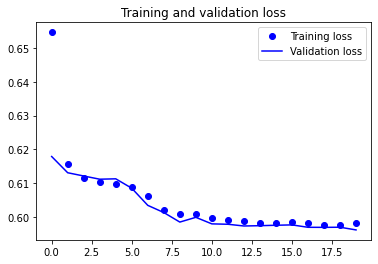

In [26]:
# Loss and PLOT
loss = autoencoder.history.history['loss']
val_loss = autoencoder.history.history['val_loss']
epochs = range(20)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("train_test_loss.jpeg")

Prediction

In [27]:
# Prediction
encoded_train = pd.DataFrame(encoder.predict(train))
encoded_train = encoded_train.add_prefix('feature_')
encoded_test = pd.DataFrame(encoder.predict(test))
encoded_test = encoded_test.add_prefix('feature_')


print (encoded_train.shape)
print (encoded_test.shape)

train_out=pd.concat([train_id,encoded_train], axis=1)
test_out=pd.concat([test_id,encoded_test], axis=1)

(293, 50)
(74, 50)


Download output files

In [28]:
####### OUTPUT FEATURE EXTRACTED DATASET #########
from google.colab import files

train_out.to_csv('deep_train_mat.csv', index=False)
test_out.to_csv('deep_test_mat.csv', index=False)

# to download files on your system
#files.download("deep_train_mat.csv")
#files.download("deep_test_mat.csv")